In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sncf = pd.read_csv("../csv/sncf.csv")

In [3]:
sncf["date"] = sncf["date"].apply(lambda x: x[:10])
sncf["date"] = pd.to_datetime(sncf["date"])
sncf["year"] = sncf["date"].dt.year
sncf["month"] = sncf["date"].dt.month
sncf["week"] = sncf["date"].dt.week
sncf["day"] = sncf["date"].dt.day
sncf["day_of_week"] = sncf["date"].dt.day_of_week.map({0:"Lundi", 1: "Mardi", 2: "Mercredi",
                                                                   3: "Jeudi", 4: "Vendredi",
                                                                   5: "Samedi", 6: "Dimanche"})

<ipython-input-3-bac0df43097f>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  sncf["week"] = sncf["date"].dt.week


In [4]:
sncf["number"] = 1
sncf.to_csv('../csv/sncf_clean.csv', index=False)

In [5]:
sncf

,type,gare,nature,nom,date,restitution_date,year,month,week,day,day_of_week,number
0,"Porte-monnaie / portefeuille, argent, titres",Lille Europe,Chéquier,Objet trouvé,2016-12-31,NaN,2016,12,52,31,Samedi,1
1,"Appareils électroniques, informatiques, appare...",Lille Europe,"Tablette tactile protégée (étui, housse)",Objet trouvé,2016-12-31,NaN,2016,12,52,31,Samedi,1
2,Pièces d'identités et papiers personnels,Lille Europe,Carte Vitale,Objet trouvé,2016-12-31,NaN,2016,12,52,31,Samedi,1
3,"Bagagerie: sacs, valises, cartables",Lille Europe,"Valise, sac sur roulettes",Objet trouvé,2016-12-31,2017-01-02T10:20:06+00:00,2016,12,52,31,Samedi,1
4,"Bagagerie: sacs, valises, cartables",Lille Europe,Sac à main,Objet trouvé,2016-12-31,2017-01-23T12:03:06+00:00,2016,12,52,31,Samedi,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22208,"Appareils électroniques, informatiques, appare...",Lille Europe,"Téléphone portable protégé (étui, coque,…)",Objet trouvé,2023-01-02,NaN,2023,1,1,2,Lundi,1
22209,Pièces d'identités et papiers personnels,Lille Europe,"Carte d'identité, passeport, permis de conduire",Objet trouvé,2023-01-01,NaN,2023,1,52,1,Dimanche,1
22210,"Appareils électroniques, informatiques, appare...",Lille Europe,"AirPod, casque audio, écouteurs",Objet trouvé,2023-01-01,NaN,2023,1,52,1,Dimanche,1
22211,"Bagagerie: sacs, valises, cartables",Lille Europe,Sac à main,Objet trouvé,2023-01-01,2023-01-01T07:11:10+00:00,2023,1,52,1,Dimanche,1


In [6]:
df_year = sncf[["number","year"]].groupby("year").sum().reset_index()
df_year

,year,number
0,2016,4131
1,2017,4614
2,2018,4364
3,2019,3005
4,2020,1526
5,2021,1915
6,2022,2645
7,2023,13


In [7]:
df_month = sncf[["number","month"]].groupby("month").sum().reset_index()
df_month

,month,number
0,1,1846
1,2,1740
2,3,1690
3,4,1543
4,5,1701
5,6,1992
6,7,2121
7,8,1870
8,9,2113
9,10,2103


In [8]:
df_weeks = sncf[["number","week"]].groupby("week").sum().reset_index()
df_weeks

,week,number
0,1,418
1,2,405
2,3,412
3,4,412
4,5,445
5,6,437
6,7,433
7,8,433
8,9,400
9,10,431


In [9]:
df_day = sncf[["number","day", "month"]].groupby(["month", "day"]).sum().reset_index()
df_day

,month,day,number
0,1,1,44
1,1,2,75
2,1,3,85
3,1,4,71
4,1,5,43
...,...,...,...
361,12,27,56
362,12,28,43
363,12,29,60
364,12,30,53


In [10]:
temp = sncf[["number","year", "month"]].groupby(["year", "month"]).sum().reset_index()
df = temp[["number", "month"]].groupby("month").mean().reset_index()
df

,month,number
0,1,230.750000
1,2,248.571429
2,3,241.428571
3,4,257.166667
4,5,243.000000
5,6,284.571429
6,7,303.000000
7,8,267.142857
8,9,301.857143
9,10,300.428571


In [11]:
df_1 = sncf[["number","year", "week", "day_of_week"]].groupby(["year", "week", "day_of_week"]).sum().reset_index()
df_1 = df_1[["number", "day_of_week"]].groupby("day_of_week").mean().reset_index()
df_1

,day_of_week,number
0,Dimanche,7.251445
1,Jeudi,9.461972
2,Lundi,11.263305
3,Mardi,8.988506
4,Mercredi,8.367816
5,Samedi,8.971014
6,Vendredi,9.190202


<AxesSubplot:xlabel='year', ylabel='month'>

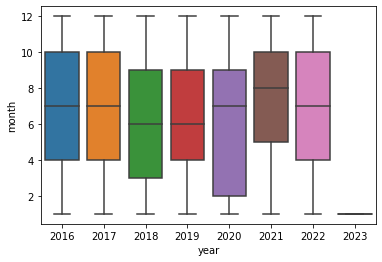

In [12]:
sns.boxplot(data=sncf, x="year", y="month")

<AxesSubplot:xlabel='month', ylabel='number'>

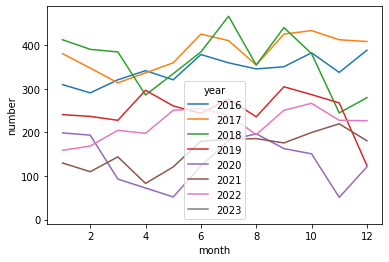

In [13]:
sns.lineplot(x=temp['month'], y = temp['number'], hue=temp['year'], palette='tab10')

In [14]:
df_trend = sncf[["year", "month", "number"]]

In [15]:
df_trend["periode"] = df_trend["year"].astype(str) + df_trend["month"].astype(str)

<ipython-input-15-a77ff443f663>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trend["periode"] = df_trend["year"].astype(str) + df_trend["month"].astype(str)


In [16]:
df_trend = df_trend[["periode", 'number']].groupby("periode").sum().reset_index()

<AxesSubplot:xlabel='periode', ylabel='number'>

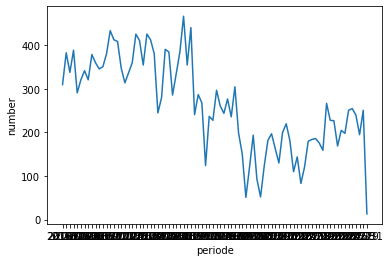

In [17]:
sns.lineplot(x=df_trend["periode"], y=df_trend["number"], sort=False)